C:\Users\hameh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


No GPU detected. Running on CPU by default.

Training Results Comparison:
  Device  Training Time (s)  Test Accuracy
0    CPU          80.456383         0.9763
1    GPU          87.420229         0.9797


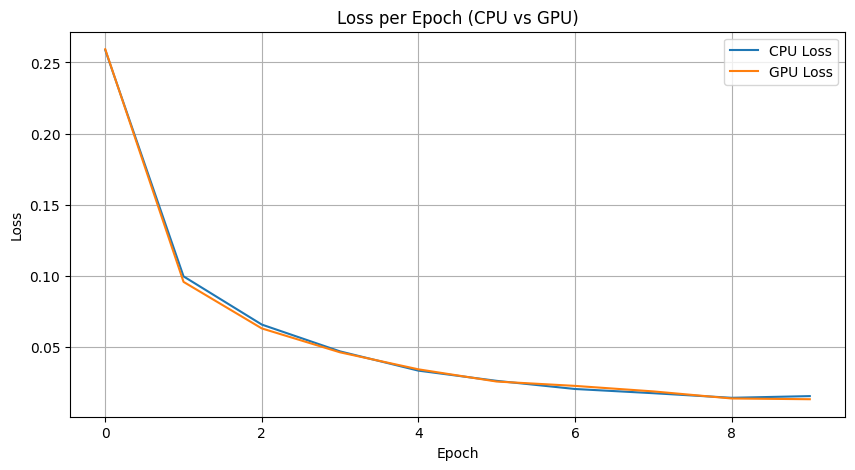

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# 3. Define a deeper model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 4. Train on CPU
with tf.device('/CPU:0'):
    model_cpu = create_model()
    start_time_cpu = time.time()
    history_cpu = model_cpu.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
    cpu_time = time.time() - start_time_cpu
    cpu_test_loss, cpu_test_acc = model_cpu.evaluate(x_test, y_test, verbose=0)

# 5. Train on GPU (if available)
device_name = tf.test.gpu_device_name()
if device_name != '':
    print(f"GPU detected: {device_name}")
else:
    print("No GPU detected. Running on CPU by default.")

model_gpu = create_model()
start_time_gpu = time.time()
history_gpu = model_gpu.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
gpu_time = time.time() - start_time_gpu
gpu_test_loss, gpu_test_acc = model_gpu.evaluate(x_test, y_test, verbose=0)

# 6. Show results
import pandas as pd

results = pd.DataFrame({
    'Device': ['CPU', 'GPU'],
    'Training Time (s)': [cpu_time, gpu_time],
    'Test Accuracy': [cpu_test_acc, gpu_test_acc]
})

print("\nTraining Results Comparison:")
print(results)

# 7. Plot loss curves 
plt.figure(figsize=(10, 5))
plt.plot(history_cpu.history['loss'], label='CPU Loss')
plt.plot(history_gpu.history['loss'], label='GPU Loss')
plt.title('Loss per Epoch (CPU vs GPU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
